In [30]:
import base64
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import json
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

In [21]:
df = pd.read_csv('experiment_results.csv')

def parse(data):
    while data[0] != '{':
        data = data[1:]
    while data[-1] != '}':
        data = data[:-1]
    data = data.replace('\\', '')
    json_data = json.loads(data)
    return json_data


df = pd.concat([df, pd.json_normalize(df.apply(lambda x: parse(x['answer']), axis=1), max_level=0)], axis=1)
df.gaze = df.gaze.apply(lambda x: {key:val for key, val in json.loads(base64.b64decode(x)).items() if int(key) > 0})
df.sort_values(by=['workerid', 'timestamp'], inplace=True)
df

,filename,listnumber,assignmentid,hitid,workerid,origin,timestamp,partid,questionid,answer,...,answerTime,choicePos,choice,coordinates,gaze,correct,device_info,tech_diffs,other_comments,strategy
0,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106369,"""{\""userTrialId\"":1,\""sent_msg\"":\""re\"",\""objs...",...,5812,1,ci_re,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...","{'26': {'x': 995, 'y': 482, 'eyes': {'left': {...",0.0,NaN,NaN,NaN,NaN
2,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106370,"""{\""userTrialId\"":2,\""sent_msg\"":\""ci\"",\""objs...",...,5662,2,ci_bl,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...","{'77': {'x': 1120, 'y': 423, 'eyes': {'left': ...",0.0,NaN,NaN,NaN,NaN
4,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106371,"""{\""userTrialId\"":3,\""sent_msg\"":\""gr\"",\""objs...",...,3422,1,ci_gr,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...",{},1.0,NaN,NaN,NaN,NaN
6,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106372,"""{\""userTrialId\"":4,\""sent_msg\"":\""bl\"",\""objs...",...,19986,1,sq_bl,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...","{'21': {'x': 985, 'y': 473, 'eyes': {'left': {...",1.0,NaN,NaN,NaN,NaN
8,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106373,"""{\""userTrialId\"":5,\""sent_msg\"":\""gr\"",\""objs...",...,10039,2,tr_gr,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...","{'36': {'x': 1137, 'y': 542, 'eyes': {'left': ...",1.0,NaN,NaN,NaN,NaN
10,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106374,"""{\""userTrialId\"":6,\""sent_msg\"":\""bl\"",\""objs...",...,16504,2,tr_gr,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...","{'16': {'x': 1004, 'y': 523, 'eyes': {'left': ...",0.0,"{'screen': '2048 x 1152', 'browser': 'Microsof...",no,no,NaN
12,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106375,"""{\""userTrialId\"":7,\""sent_msg\"":\""tr\"",\""objs...",...,3686,0,tr_bl,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...",{},0.0,NaN,NaN,NaN,NaN
14,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106376,"""{\""userTrialId\"":8,\""sent_msg\"":\""sq\"",\""objs...",...,8770,1,sq_bl,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...","{'64': {'x': 1038, 'y': 458, 'eyes': {'left': ...",1.0,NaN,NaN,NaN,NaN
16,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106377,"""{\""userTrialId\"":9,\""sent_msg\"":\""ci\"",\""objs...",...,3993,0,ci_gr,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...",{},1.0,NaN,NaN,NaN,NaN
18,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,322223,PROLIFIC,29-Dec-2024 12:25:08,7103,106378,"""{\""userTrialId\"":10,\""sent_msg\"":\""gr\"",\""obj...",...,1829,0,sq_gr,"{'sent_msg': {'x': 903, 'y': 121, 'width': 100...",{},1.0,NaN,NaN,NaN,NaN


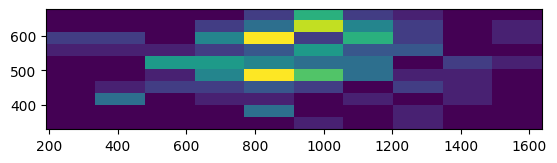

In [ ]:
sample = df.iloc[3]
gaze_sample = sample.gaze
x = np.array([g['x'] for g in gaze_sample.values()])
y = np.array([g['y'] for g in gaze_sample.values()])

sns.jointplot(x=x, y=y, kind='hex')

plt.show()